In [1]:
# common package
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
eval1 = pickle.load(open('eval/eval_knn1.pkl','rb'))
eval2 = pickle.load(open('eval/eval_knn2.pkl','rb'))
eval3 = pickle.load(open('eval/eval_svm1.pkl','rb'))

In [3]:
matrix = np.array([eval1,
                  eval2,
                  eval3])
matrix

array([[696,  68, 185, 215],
       [718,  46, 157, 243],
       [733,  31, 144, 256]], dtype=int64)

In [4]:
# dataframe
df = pd.DataFrame(matrix, columns=['tn', 'fp', 'fn', 'tp'], index=[f'model {n}' for n in range(1,4)])
df

,tn,fp,fn,tp
model 1,696,68,185,215
model 2,718,46,157,243
model 3,733,31,144,256


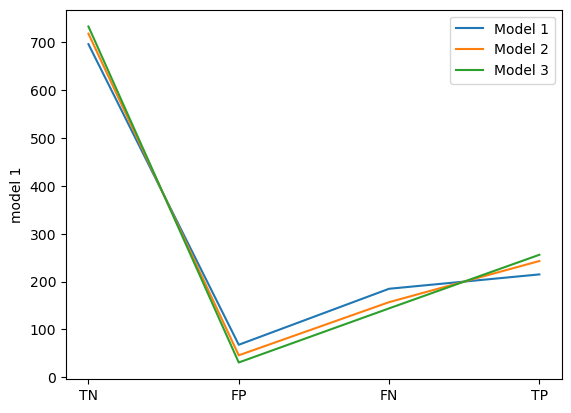

In [5]:
# visualisation
plt.figure()
for i in range(3):
    D = df.iloc[i]
    sns.lineplot(x=['TN', 'FP', 'FN', 'TP'], y=D, label=f'Model {i+1}')

plt.legend()
plt.show()

# Visualization with Scalling

In [10]:
# scale df
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(1,10))
matrix_scale = mms.fit_transform(df)
df_scale = pd.DataFrame(matrix_scale, columns=['tn', 'fp', 'fn', 'tp'], index=[f'model {n}' for n in range(1,4)])

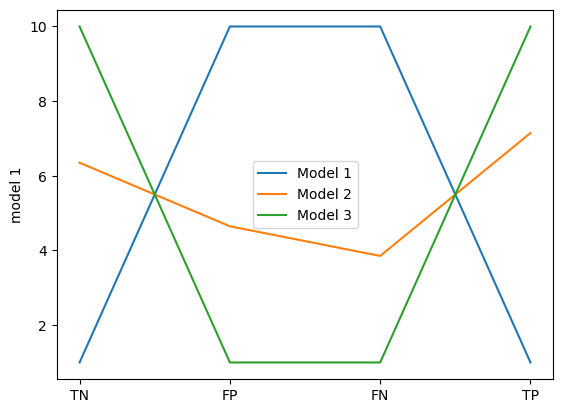

In [11]:
plt.figure()
for i in range(3):
    D = df_scale.iloc[i]
    sns.lineplot(x=['TN', 'FP', 'FN', 'TP'], y=D, label=f'Model {i+1}')

plt.legend()
plt.show()